In [7]:
from run_pygad_variable_pop_mp import * 
from multiprocessing import Pool
import glob
import seaborn as sns
import matplotlib.pyplot as plt


ERROR! Session/line number was not unique in database. History logging moved to new session 2196


In [18]:
# PAH 
loc = '/grid/home/nbourgeois/data/test_proteins/pah/pah.pep.fas' #sequence pep.fas Input

(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pah_seq=str(seqs[0])
    
# PAH targets
loc = '/grid/home/nbourgeois/data/test_proteins/pah/MMUT.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pahtar_seq1=str(seqs[0])
    
loc = '/grid/home/nbourgeois/data/test_proteins/pah/OTC.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pahtar_seq2=str(seqs[0])
    
loc = '/grid/home/nbourgeois/data/test_proteins/pah/ATP7B.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    pahtar_seq3=str(seqs[0])
    

#hidua
loc = '/grid/home/nbourgeois/data/test_proteins/hidua/hidua.pep.fas' #sequence pep.fas Input
(keys, seqs) = readFasta(loc)
if len(seqs) == 1:
    hidua_seq=str(seqs[0])
    
prefixes = ['10kgen_pah','100kgen_MMUT','100kgen_OTC','100kgen_ATP7B','100kgen_hidua']
proteins = [pah_seq,pahtar_seq1,pahtar_seq2,pahtar_seq3,hidua_seq]
tissues = ['Liver','Liver','Liver','Liver','Brain_Cerebellum']

In [9]:
combinations = []
# populations = [10,20,30,40,50,75,100,150,200]
populations = [500,1000,1500,2000,2500]
for prefix, aa_seq, tissue in zip(prefixes, proteins, tissues):
    for population in populations:
        combinations.append((prefix,aa_seq,tissue,population))

In [10]:
def multi_GA_wrapper(args):
    return run_GA_comb(*args)

def run_GA_comb(prefix,aa_seq,tissue,population):
    print(prefix+str(population),'\n')
    filename = prefix+str(population)+'.csv'
    timefit = run_GA(aa_seq, 
           tissue, 
           filename, 
           population_size=20,
           cai_on = True, 
           bai_on = True, 
           cpg_on = True)
    pd.DataFrame(timefit).to_csv(filename,index=False)
    

In [ ]:
with Pool(processes=len(combinations)) as pool:
    pool.map(multi_GA_wrapper,combinations)

ATP7B1000hidua2000hidua500ATP7B1500ATP7B2000ATP7B2500hidua1500hidua2500ATP7B500hidua1000 
         




















ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/data/software/anaconda3/envs/bfx-gpu/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/data/software/anaconda3/envs/bfx-gpu/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/tmp/ipykernel_121271/4140718637.py", line 2, in multi_GA_wrapper
    return run_GA_comb(*args)
  File "/tmp/ipykernel_121271/4140718637.py", line 13, in run_GA_comb
    cpg_on = True)
  File "/grid/home/nbourgeois/codonOpt/tests/benchmark/population/run_pygad_variable_pop_mp.py", line 76, in run_GA
    ga_instance = GA_super(codon_to_int,gene_space,gene_space_int,population_size,tissue,threads)
  File "/grid/home/nbourgeois/codonOpt/tests/benchmark/population/run_pygad_variable_pop_mp.py", line 103, in __init__
    self.pool = Pool(processes=threads)
  File "/data/software/anaconda3/envs/bfx-gpu/lib/python3.7/multiprocessing

In [11]:
def find_prefix(prefixes,word):
    for prefix in prefixes:
        loc = word.find(prefix)
        if (loc != -1):
            ind = loc + len(prefix)
            return ind
    print('error')
    return(-1)

In [19]:
find_prefix(prefixes,'100kgen_OTC50')

11

In [20]:
temp_df = pd.read_csv(afile, names = ['Time','Fitness'])
temp_df

,Time,Fitness
0,0.000000,1.000000
1,29.543066,0.613742
2,29.550339,0.626147
3,29.557996,0.628026
4,29.565621,0.633163
...,...,...
119996,7416.695375,0.877990
119997,7416.958549,0.877990
119998,7417.220037,0.877990
119999,7417.479475,0.877990


In [21]:
files = glob.glob('10*.csv')
df_list = []
for afile in files:
    temp_df = pd.read_csv(afile, names = ['Time','Fitness'])

    file_id = afile.split('.')[0]
    ind = find_prefix(prefixes,file_id)
    prefix = file_id[:ind]
    pop = file_id[ind:]
    
    temp_df['Protein'] = prefix
    temp_df['Population'] = pop
    
    df_list.append(temp_df )
    
    
    
    
    

In [23]:
df = pd.concat(df_list)
df = df.astype({'Population': 'int32'})
df = df.sort_values(['Population','Time'])
df = df.astype({'Population': 'str'})


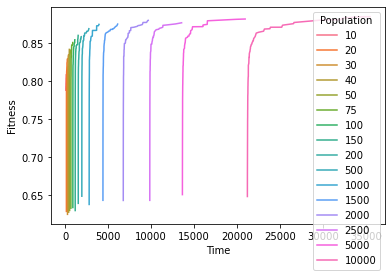

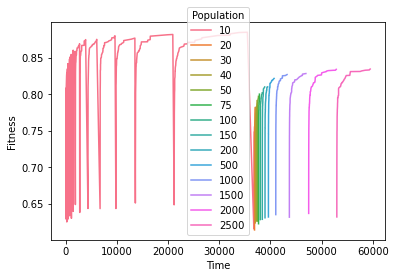

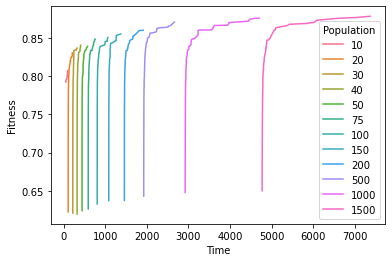

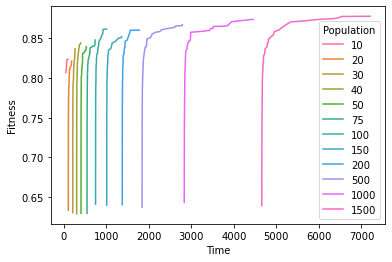

In [24]:
for protein in df['Protein'].unique():
    df_pah = df.loc[df['Protein']==protein]
    df_pah = df_pah.loc[df_pah['Time'] > 50]

    df_pah = df_pah.drop_duplicates(subset=['Fitness'], keep='first')
    df_pah = df_pah.reset_index(drop=True)
    ax = sns.lineplot(data=df_pah, x="Time", y="Fitness", hue="Population")
    plt.show()

In [25]:
plt.show()

In [84]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


<AxesSubplot:xlabel='Time', ylabel='Fitness'>

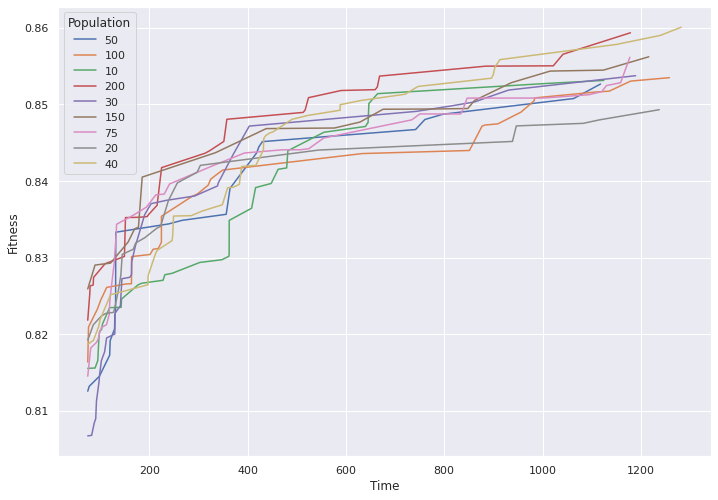